### MAUDE Dataset

https://www.fda.gov/medical-devices/medical-device-reporting-mdr-how-report-medical-device-problems/mdr-data-files 

In [95]:
import pandas as pd
# from tqdm import tqdm
from IPython.display import display
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### PLEASE SKIP this part, scroll to Section 2 and continue from there

In [2]:
# List of file paths
file_paths = [f"DEVICE{year}.txt" for year in range(2014, 2025)]

# Read and concatenate the dataframes
device_data = pd.concat(
    [pd.read_csv(file, delimiter="|", encoding="ISO-8859-1", on_bad_lines="skip", low_memory=False) for file in file_paths], 
    ignore_index=True
)

In [3]:
device_data.head(10)

,MDR_REPORT_KEY,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,DATE_RECEIVED,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,...,LOT_NUMBER,OTHER_ID_NUMBER,DEVICE_AVAILABILITY,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC
0,3075221,NaN,NaN,NaN,1,2014/01/30,DIAMONDBACK 360 ORBITAL ATHERECTOMY SYSTEM,"ORBITAL ATHERECTOMY SYSTEM, PRODUCT CODE: MCW",CARDIOVASCULAR SYSTEMS INCORPORATED,651 CAMPUS DRIVE,...,69288,NaN,Y,2013/03/26,MCW,DA,N,N,NaN,NaN
1,3545727,NaN,NaN,NaN,1,2014/01/01,PAIN MANAGEMENT GENERATOR,PAIN MANAGEMENT GENERATOR,KIMBERLY-CLARK HEALTH CARE,1400 HOLCOMB BRIDGE RD,...,NaN,NaN,N,NaN,GXD,NaN,R,N,NaN,NaN
2,3545728,NaN,NaN,NaN,1,2014/01/01,OT VERIO IQ METER,GLUCOSE MONITORING SYS/KIT,"LIFESCAN EUROPE, A DIVISION OF CILAG GMBH INTL",GUBELSTRASSE 34,...,NaN,NaN,N,NaN,NBW,NaN,R,N,NaN,NaN
3,3545729,NaN,NaN,NaN,1,2014/01/01,OT VERIO IQ METER,GLUCOSE MONITORING SYS/KIT,"LIFESCAN EUROPE, A DIVISION OF CILAG GMBH INTL",GUBELSTRASSE 34,...,3514888,NaN,R,2014/02/28,NBW,DA,Y,N,NaN,NaN
4,3545730,NaN,NaN,NaN,1,2014/01/01,OT VERIO IQ METER,GLUCOSE MONITORING SYS/KIT,"LIFESCAN EUROPE, A DIVISION OF CILAG GMBH INTL",GUBELSTRASSE 34,...,3390309,NaN,R,2014/02/28,NBW,DA,Y,N,NaN,NaN
5,3545731,NaN,NaN,NaN,1,2014/01/01,OT PING METER,GLUCOSE MONITORING SYS/KIT,"LIFESCAN EUROPE, A DIVISION OF CILAG GMBH INTL",GUBELSTRASSE 34,...,3526566,NaN,R,2014/03/24,NBW,DA,Y,N,NaN,NaN
6,3545732,NaN,NaN,NaN,1,2014/01/01,OT VERIO IQ METER,GLUCOSE MONITORING SYS/KIT,"LIFESCAN EUROPE, A DIVISION OF CILAG GMBH INTL",GUBELSTRASSE 34,...,NaN,NaN,R,2014/03/18,NBW,DA,Y,N,NaN,NaN
7,3545733,NaN,NaN,NaN,1,2014/01/01,OT PING METER,GLUCOSE MONITORING SYS/KIT,"LIFESCAN EUROPE, A DIVISION OF CILAG GMBH INTL",GUBELSTRASSE 34,...,3504354,NaN,N,NaN,NBW,NaN,R,N,NaN,NaN
8,3545734,NaN,NaN,NaN,1,2014/01/01,OT PING METER,GLUCOSE MONITORING SYS/KIT,"LIFESCAN EUROPE, A DIVISION OF CILAG GMBH INTL",GUBELSTRASSE 34,...,3526566,NaN,R,2014/03/24,NBW,DA,Y,N,NaN,NaN
9,3545735,NaN,NaN,NaN,1,2014/01/01,OT VERIO IQ METER,GLUCOSE MONITORING SYS/KIT,"LIFESCAN EUROPE, A DIVISION OF CILAG GMBH INTL",GUBELSTRASSE 34,...,3470332,NaN,N,NaN,NBW,NaN,R,N,NaN,NaN


In [4]:
years = range(2014, 2025)
foi_data = pd.concat(
    (pd.read_csv(f"foitext{year}.txt" , delimiter="|", encoding="ISO-8859-1", on_bad_lines="skip", low_memory=False).assign(YEAR=year) for year in years),
    ignore_index=True
)

print(foi_data.head())

   MDR_REPORT_KEY  MDR_TEXT_KEY TEXT_TYPE_CODE  PATIENT_SEQUENCE_NUMBER  \
0         3546763       3975489              D                        1   
1         3546717       3975490              D                        1   
2         3546721       3975492              D                        1   
3         3547148       3975497              D                        1   
4         3547102       3975498              D                        1   

   DATE_REPORT                                           FOI_TEXT  YEAR  
0          NaN  IT WAS REPORTED THAT THE CATHETER WAS FOUND TO...  2014  
1          NaN  IT WAS REPORTED THAT THE SET SCREW SLIPPED DUR...  2014  
2          NaN  IT WAS REPORTED VIA REPAIR WORK ORDER THAT THE...  2014  
3          NaN  THE PUMP WAS RETURNED FOR INVESTIGATION. INVES...  2014  
4          NaN  IT WAS REPORTED THAT A CONTINU-FLO SECONDARY S...  2014  


In [ ]:
foi_data.head(10)

In [5]:
device_data.shape

(17396748, 31)

In [6]:
device_data['MDR_REPORT_KEY'] = device_data['MDR_REPORT_KEY'].astype(str)
foi_data['MDR_REPORT_KEY'] = foi_data['MDR_REPORT_KEY'].astype(str)
foi_devices = foi_data.merge(device_data, on="MDR_REPORT_KEY", how="left", suffixes=('', '_device'))

['STENT, CORONARY, DRUG-ELUTING' 'DRUG ELUTING CORONARY STENT SYSTEM'
 'CORONARY DRUG-ELUTING STENT' 'DRUG ELUTING CORONARY STENT SYTEM'
 'DRUG ELUTING CORONARY STENT' 'DRUG ELUTING CORONARY STENT SYS'
 'CORONARY DRUG-ELUTING STENT SYSTEM'
 'BIODEGRADABLE POLYMER DRUG ELUTING CORONARY STENT SYSTEM'
 'CORONARY DRUG - ELUTING STENT' 'STENT, CORONARY DRUG-ELUTING'
 'CORONARY DRUG ELUTING STENT' 'CORONARY DRUG- ELUTING STENT'
 'CORONARY, DRUG-ELUTING STENT' 'ABSORBABLE CORONARY DRUG - ELUTING STENT'
 'CORONARY DRUG-ELUTING STENT,' 'STENT CORONARY DRUG-ELUTING'
 'SYNERGY CORONARY DRUG ELUTING STENT' 'DOSE CORONARY DRUG ELUTING STENT'
 'DRUG-ELUTING CORONARY ARTERY STENT'
 'DRUG ELUTING CORONARY STENT DELIVERY SYSTEM'
 'DRUG-ELUTING CORONARY STENT SYSTEM' 'CORONARY DRUG-ELUTING STENT.'
 'STENT, CORONARY, DRUG ELUTING' 'CARDIAC CORONARY DRUG-ELUTING STENT'
 'Coronary drug-eluting stent']


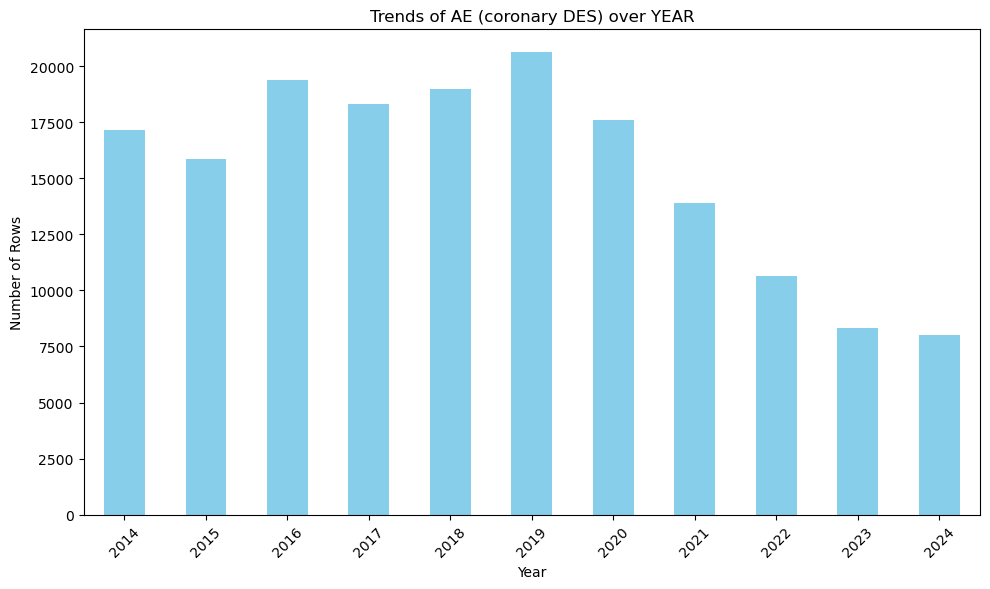

In [8]:
# Extract adverse events from foi_text
des2014_24 = foi_devices[foi_devices["GENERIC_NAME"].fillna('').str.lower().str.contains(r"(?=.*stent)(?=.*drug)(?=.*eluting)(?=.*coronary)", regex=True)]

des2014_24.head()

print(des2014_24["GENERIC_NAME"].unique())

import matplotlib.pyplot as plt

grouped = des2014_24.groupby('YEAR').size()
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='skyblue')
plt.title('Trends of AE (coronary DES) over YEAR')
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [9]:
# total reported 
des2014_24.shape

(168798, 37)

In [10]:
### master event data record
import pandas as pd

file_path = "mdrfoiThru2024.txt"
master = pd.read_csv(file_path, delimiter="|", encoding="ISO-8859-1", on_bad_lines="skip", low_memory=False)

master.shape

(13405571, 84)

In [11]:
### Just convert the date for all master event data record
import pandas as pd

def convert_date(x):
    try:
        # First check if the value is numeric (it could be an Excel serial date number)
        if isinstance(x, (int, float)) or (x.isdigit() if isinstance(x, str) else False):
            # Convert Excel serial date number to datetime
            return pd.to_datetime(x, origin='1900-01-01', unit='D')
        else:
            # If it's not numeric, treat it as a standard date string and convert
            return pd.to_datetime(x, format='%m/%d/%Y', errors='raise')  # 'raise' will throw error for invalid formats
    except (ValueError, TypeError):
        # If it can't be converted, return NaT (Not a Time)
        return pd.NaT

In [12]:
des2014_24 = des2014_24.set_index('MDR_REPORT_KEY')

In [13]:
des2014_24.shape, master.shape

((168798, 36), (13405571, 84))

In [14]:
# combine master record events with device/foi_text file
desPatient = master.merge(des2014_24, on = 'MDR_REPORT_KEY', how = 'left', suffixes=('_master', ''))

In [15]:
all_desPatient = desPatient[~desPatient["FOI_TEXT"].isna()]
all_desPatient.index.value_counts().sort_values(ascending=False)

9297        1
21443       1
13045       1
13046       1
13047       1
           ..
10185502    1
10185839    1
10185022    1
10185021    1
10185840    1
Name: count, Length: 95752, dtype: int64

In [16]:
# Filter Manufacturer  report
manufacturer = all_desPatient[all_desPatient["REPORT_SOURCE_CODE"] == "M"]

# Filter Voluntary report
voluntary = all_desPatient[all_desPatient["REPORT_SOURCE_CODE"] == "P"]

all_desPatient.shape, manufacturer.shape, voluntary.shape
# ((95759, 120), (95492, 120), (104, 120)) # b4 merge with patient data

((95752, 120), (95489, 120), (101, 120))

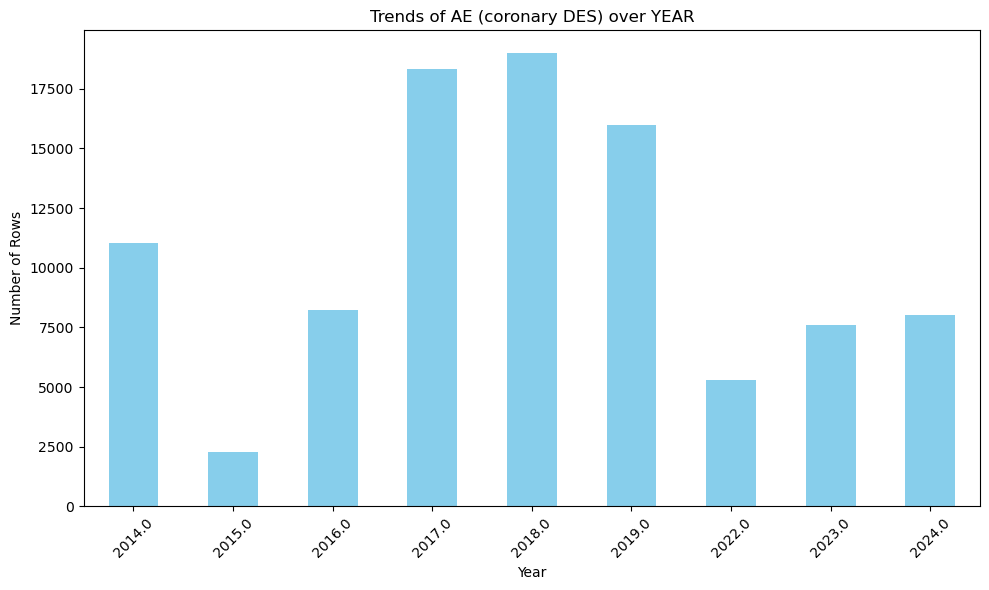

In [17]:
# total master event records with foi_text data
import matplotlib.pyplot as plt

grouped = all_desPatient.groupby('YEAR').size()
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='skyblue')
plt.title('Trends of AE (coronary DES) over YEAR')
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [18]:
# merge with patient data as well to get demographic data
file_path = "patientThru2024.txt"
patient = pd.read_csv(file_path, delimiter="|", encoding="ISO-8859-1", on_bad_lines="skip", low_memory=False)

patient['MDR_REPORT_KEY'] = patient['MDR_REPORT_KEY'].astype(str)
alldata = all_desPatient.merge(patient, on = 'MDR_REPORT_KEY', how = 'left', suffixes=('', '_patient'))

In [22]:
patient.columns

Index(['MDR_REPORT_KEY', 'PATIENT_SEQUENCE_NUMBER', 'DATE_RECEIVED',
       'SEQUENCE_NUMBER_TREATMENT', 'SEQUENCE_NUMBER_OUTCOME', 'PATIENT_AGE',
       'PATIENT_SEX', 'PATIENT_WEIGHT', 'PATIENT_ETHNICITY', 'PATIENT_RACE'],
      dtype='object')

In [25]:
cols = ['MDR_REPORT_KEY',
 'SEQUENCE_NUMBER_TREATMENT',
 'SEQUENCE_NUMBER_OUTCOME',
 'PATIENT_AGE',
 'PATIENT_SEX',
 'PATIENT_WEIGHT',
 'PATIENT_ETHNICITY',
 'PATIENT_RACE',
 'PATIENT_SEQUENCE_NUMBER_patient',
 'DATE_RECEIVED_patient']
for i in cols:
    print(alldata[i].isna().value_counts())

MDR_REPORT_KEY
False    95768
Name: count, dtype: int64
SEQUENCE_NUMBER_TREATMENT
True     87696
False     8072
Name: count, dtype: int64
SEQUENCE_NUMBER_OUTCOME
True     52763
False    43005
Name: count, dtype: int64
PATIENT_AGE
True     48411
False    47357
Name: count, dtype: int64
PATIENT_SEX
True     74777
False    20991
Name: count, dtype: int64
PATIENT_WEIGHT
True     72968
False    22800
Name: count, dtype: int64
PATIENT_ETHNICITY
True     95422
False      346
Name: count, dtype: int64
PATIENT_RACE
True     94214
False     1554
Name: count, dtype: int64
PATIENT_SEQUENCE_NUMBER_patient
False    95239
True       529
Name: count, dtype: int64
DATE_RECEIVED_patient
False    95239
True       529
Name: count, dtype: int64


In [ ]:
#### assuming patient sequence number is patient ID which I think is not
temp = alldata[~alldata["PATIENT_SEQUENCE_NUMBER_patient"].isna()]
# PATIENT_SEQUENCE_NUMBER_patient	DATE_RECEIVED_patient	SEQUENCE_NUMBER_TREATMENT	SEQUENCE_NUMBER_OUTCOME	PATIENT_AGE	PATIENT_SEX	PATIENT_WEIGHT	PATIENT_ETHNICITY	PATIENT_RACE
cols = patient.columns.to_list()

cols.remove("PATIENT_SEQUENCE_NUMBER") # same as  PATIENT_SEQUENCE_NUMBER_patient
cols.remove("DATE_RECEIVED") # same as  DATE_RECEIVED_patient
cols.append("PATIENT_SEQUENCE_NUMBER_patient") 
cols.append("DATE_RECEIVED_patient")

for col in cols:
    print(temp[col].isna().value_counts())

MDR_REPORT_KEY
False    95239
Name: count, dtype: int64
SEQUENCE_NUMBER_TREATMENT
True     87167
False     8072
Name: count, dtype: int64
SEQUENCE_NUMBER_OUTCOME
True     52234
False    43005
Name: count, dtype: int64
PATIENT_AGE
True     47882
False    47357
Name: count, dtype: int64
PATIENT_SEX
True     74248
False    20991
Name: count, dtype: int64
PATIENT_WEIGHT
True     72439
False    22800
Name: count, dtype: int64
PATIENT_ETHNICITY
True     94893
False      346
Name: count, dtype: int64
PATIENT_RACE
True     93685
False     1554
Name: count, dtype: int64
PATIENT_SEQUENCE_NUMBER_patient
False    95239
Name: count, dtype: int64
DATE_RECEIVED_patient
False    95239
Name: count, dtype: int64


In [28]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(temp.head(20))

,MDR_REPORT_KEY,EVENT_KEY,REPORT_NUMBER,REPORT_SOURCE_CODE,MANUFACTURER_LINK_FLAG_,NUMBER_DEVICES_IN_EVENT,NUMBER_PATIENTS_IN_EVENT,DATE_RECEIVED_master,ADVERSE_EVENT_FLAG,PRODUCT_PROBLEM_FLAG,DATE_REPORT_master,DATE_OF_EVENT,REPROCESSED_AND_REUSED_FLAG,REPORTER_OCCUPATION_CODE,HEALTH_PROFESSIONAL,INITIAL_REPORT_TO_FDA,DATE_FACILITY_AWARE,REPORT_DATE,REPORT_TO_FDA,DATE_REPORT_TO_FDA,EVENT_LOCATION,DATE_REPORT_TO_MANUFACTURER,MANUFACTURER_CONTACT_T_NAME,MANUFACTURER_CONTACT_F_NAME,MANUFACTURER_CONTACT_L_NAME,MANUFACTURER_CONTACT_STREET_1,MANUFACTURER_CONTACT_STREET_2,MANUFACTURER_CONTACT_CITY,MANUFACTURER_CONTACT_STATE,MANUFACTURER_CONTACT_ZIP_CODE,MANUFACTURER_CONTACT_ZIP_EXT,MANUFACTURER_CONTACT_COUNTRY,MANUFACTURER_CONTACT_POSTAL,MANUFACTURER_CONTACT_AREA_CODE,MANUFACTURER_CONTACT_EXCHANGE,MANUFACTURER_CONTACT_PHONE_NO,MANUFACTURER_CONTACT_EXTENSION,MANUFACTURER_CONTACT_PCOUNTRY,MANUFACTURER_CONTACT_PCITY,MANUFACTURER_CONTACT_PLOCAL,MANUFACTURER_G1_NAME,MANUFACTURER_G1_STREET_1,MANUFACTURER_G1_STREET_2,MANUFACTURER_G1_CITY,MANUFACTURER_G1_STATE_CODE,MANUFACTURER_G1_ZIP_CODE,MANUFACTURER_G1_ZIP_CODE_EXT,MANUFACTURER_G1_COUNTRY_CODE,MANUFACTURER_G1_POSTAL_CODE,DATE_MANUFACTURER_RECEIVED,DEVICE_DATE_OF_MANUFACTURE,SINGLE_USE_FLAG,REMEDIAL_ACTION,PREVIOUS_USE_CODE,REMOVAL_CORRECTION_NUMBER,EVENT_TYPE,DISTRIBUTOR_NAME,DISTRIBUTOR_ADDRESS_1,DISTRIBUTOR_ADDRESS_2,DISTRIBUTOR_CITY,DISTRIBUTOR_STATE_CODE,DISTRIBUTOR_ZIP_CODE,DISTRIBUTOR_ZIP_CODE_EXT,REPORT_TO_MANUFACTURER,MANUFACTURER_NAME,MANUFACTURER_ADDRESS_1,MANUFACTURER_ADDRESS_2,MANUFACTURER_CITY,MANUFACTURER_STATE_CODE,MANUFACTURER_ZIP_CODE,MANUFACTURER_ZIP_CODE_EXT,MANUFACTURER_COUNTRY_CODE,MANUFACTURER_POSTAL_CODE,TYPE_OF_REPORT,SOURCE_TYPE,DATE_ADDED,DATE_CHANGED,REPORTER_COUNTRY_CODE,PMA_PMN_NUM,EXEMPTION_NUMBER,SUMMARY_REPORT,NOE_SUMMARIZED,SUPPL_DATES_FDA_RECEIVED,SUPPL_DATES_MFR_RECEIVED,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,YEAR,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,DATE_RECEIVED,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,MANUFACTURER_D_ADDRESS_2,MANUFACTURER_D_CITY,MANUFACTURER_D_STATE_CODE,MANUFACTURER_D_ZIP_CODE,MANUFACTURER_D_ZIP_CODE_EXT,MANUFACTURER_D_COUNTRY_CODE,MANUFACTURER_D_POSTAL_CODE,DEVICE_OPERATOR,EXPIRATION_DATE_OF_DEVICE,MODEL_NUMBER,CATALOG_NUMBER,LOT_NUMBER,OTHER_ID_NUMBER,DEVICE_AVAILABILITY,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC,PATIENT_SEQUENCE_NUMBER_patient,DATE_RECEIVED_patient,SEQUENCE_NUMBER_TREATMENT,SEQUENCE_NUMBER_OUTCOME,PATIENT_AGE,PATIENT_SEX,PATIENT_WEIGHT,PATIENT_ETHNICITY,PATIENT_RACE
0,21041343,NaN,2124215-2024-79209,M,Y,NaN,NaN,12/30/2024,N,Y,12/30/2024,11/04/2024,N,001,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RACHEL,SHIELDS,4100 HAMLINE AVE N,NaN,ARDEN HILLS,MN,55112,NaN,US,55112,651,651,6512,NaN,NaN,65124221,6512422111,BOSTON SCIENTIFIC CORPORATION,BALLYBRIT BUSINESS PARK,NaN,GALWAY,NaN,NaN,NaN,EI,NaN,12/10/2024,01/27/2023,Y,NaN,I,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,"00,01,05,07,08",12/30/2024,12/30/2024,IN,NaN,NaN,N,1.0,NaN,NaN,360893829.0,N,0.0,NaN,E1: INITIAL REPORTER ADDRESS 1: (B)(6).,2024.0,NaN,NaN,NaN,1,2024/12/30,SYNERGY,CORONARY DRUG-ELUTING STENT,BOSTON SCIENTIFIC CORPORATION,300 BOSTON SCIENTIFIC WAY,NaN,MARLBOROUGH,MA,01752,NaN,US,01752,0HP,2025/01/26,10620,10620,0031008859,NaN,N,NaN,NIQ,NaN,*,Y,NaN,NaN,1.0,12/30/2024,NaN,NaN,62 YR,Male,NaN,NaN,NaN
1,21041343,NaN,2124215-2024-79209,M,Y,NaN,NaN,12/30/2024,N,Y,12/30/2024,11/04/2024,N,001,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RACHEL,SHIELDS,4100 HAMLINE AVE N,NaN,ARDEN HILLS,MN,55112,NaN,US,55112,651,651,6512,NaN,NaN,65124221,6512422111,BOSTON SCIENTIFIC CORPORATION,BALLYBRIT BUSINESS PARK,NaN,GALWAY,NaN,NaN,NaN,EI,NaN,12/10/2024,01/27/2023,Y,NaN,I,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,"00,01,05,07,08",12/30/2024,1

In [ ]:
alldata.to_csv('alldata.csv', index=False) # (all data) with & without patient demographic data
temp.to_csv('patient_coronarydes.csv', index=False) # with patient demographic data

In [ ]:
# I can analyze the master report, device and foi_text data as there are 95759 reports in total within 10 years basis.
# But, for the patient demographic: out of 95759, only 13293 rows has patient demographic data, the rest don't have 

### Section 2: you don't need to start all over from master + patient + device file again, just start from its combined file (alldata.csv)

In [ ]:
### 2 tasks for 11-17/3
### remove all duplicates from foi_text, check if report numbers is the same or first sentence is the same

In [21]:
### Directly continue from here
alldata = pd.read_csv('alldata.csv', low_memory=False)
# patient_coronarydes = pd.read_csv('patient_coronarydes.csv', low_memory=False)

alldata.shape #, patient_coronarydes.shape

(95768, 129)

In [22]:
## Remove all duplicates from foi_text
alldata["FOI_TEXT"] = alldata["FOI_TEXT"].apply(lambda x: x.strip())
df = pd.DataFrame()
cols = ['MDR_REPORT_KEY',
 'SEQUENCE_NUMBER_TREATMENT',
 'SEQUENCE_NUMBER_OUTCOME',
 'PATIENT_AGE',
 'PATIENT_SEX',
 'PATIENT_WEIGHT',
 'PATIENT_ETHNICITY',
 'PATIENT_RACE',
 'PATIENT_SEQUENCE_NUMBER_patient',
 'DATE_RECEIVED_patient']

df["foi_text"] = alldata["FOI_TEXT"].value_counts().keys() 
df["foi_text"].shape

# only 67284 out of 95759 are "unique"

#### check if the first 3 sentences are the same (for some example could be the same) 
# I think This is not work anymore since you see the excel, front part are the same but behind are different. If you only compared first 5 sentences, you will miss some info.
# keke = df["foi_text"].apply(lambda x: re.sub(r'\(\w\)\(\d+\)\.', '', str(x)).strip())
# df["first_5_sentences"] = keke.apply(lambda x: ' '.join(re.split(r'(?<=[.!?])\s+', x)[:5]))
# df["first_5_sentences"].value_counts()
# sentence_count = df["first_5_sentences"].value_counts()
# new_df = df[df["first_5_sentences"].map(lambda x: sentence_count[x] > 1)]
# # new_df.to_csv("test.csv")


#### TBC: The error could be because the patient data are different even if the foi_text are similar, but they was for different individuals, check with Indu how to deal with this?

(67284,)

In [23]:
alldata.columns.to_list()
print(alldata["DATE_ADDED"].isna().value_counts())

alldata["YEAR"] = pd.to_datetime(alldata["DATE_ADDED"]).dt.year

### We got so many different date, what are the one for looking into the year??
# DATE_RECEIVED_master, DATE_REPORT_master, DATE_OF_EVENT, DATE_REPORT_TO_FDA, DATE_REPORT_TO_MANUFACTURER, DATE_MANUFACTURER_RECEIVED, DATE_ADDED, DATE_CHANGED, DATE_REPORT, DATE_RECEIVED

False    95768
Name: DATE_ADDED, dtype: int64


In [ ]:
#### clean "patient_age" column

# return null for all the age is at least 150, so we can ignore them from analysis
def anomaly(age):
    if int(age) >= 150:
        return None
    else:
        return age
def age_cleaning(age):
    age = str(age)
    try:
        if age != "nan":
            if "DA" in age:
                return anomaly(float(re.sub(r"DA", "", str(age))) / 365)
                
            elif "MO" in age:
                return anomaly(float(re.sub(r"MO", "", str(age))) / 12)
            elif "YR" in age:
                return anomaly(float(re.sub(r"YR", "", str(age))))
            else:
                # assuming this numbers are based in YR
                # print("whyyyy", age)
                pass
                
    except Exception as e:
        print(e, age)
        return age

alldata["PATIENT_AGE"] = alldata["PATIENT_AGE"].apply(lambda x : age_cleaning(x))
# alldata["PATIENT_AGE"].to_list()

# please do not consider for those age == null or <= 1 (are they baby???)

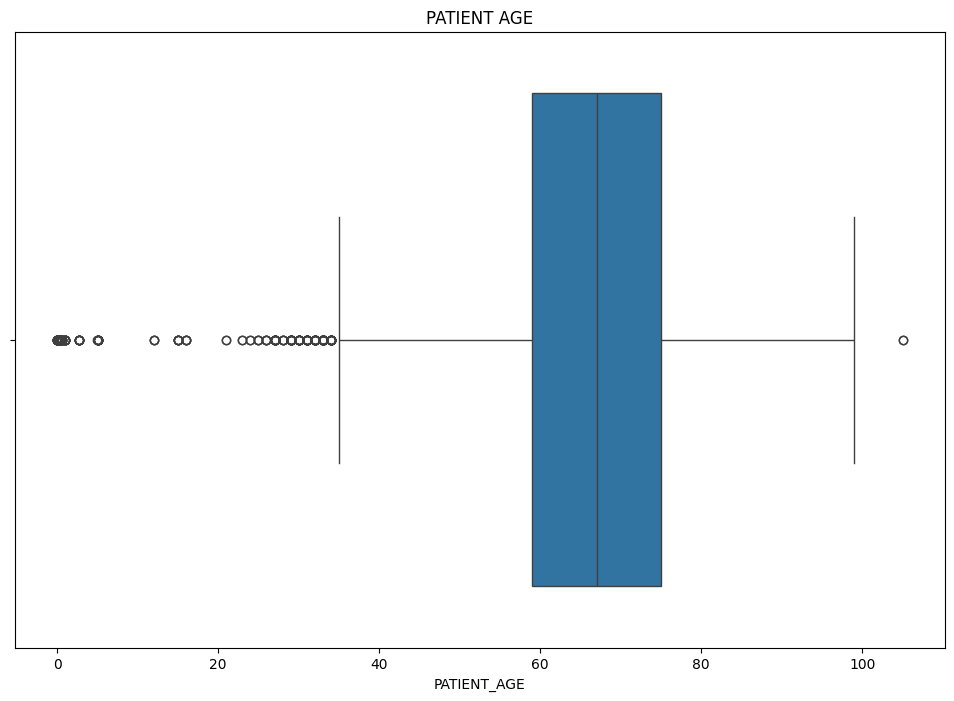

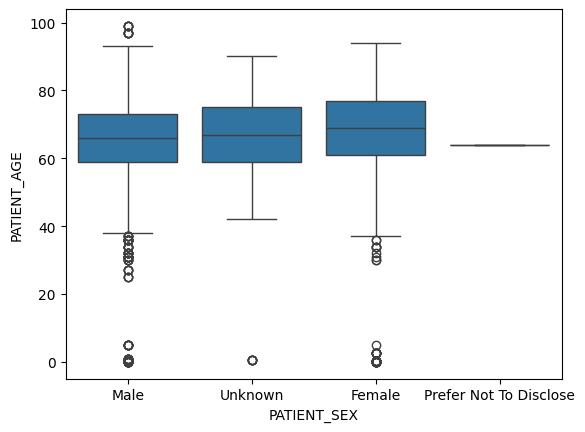

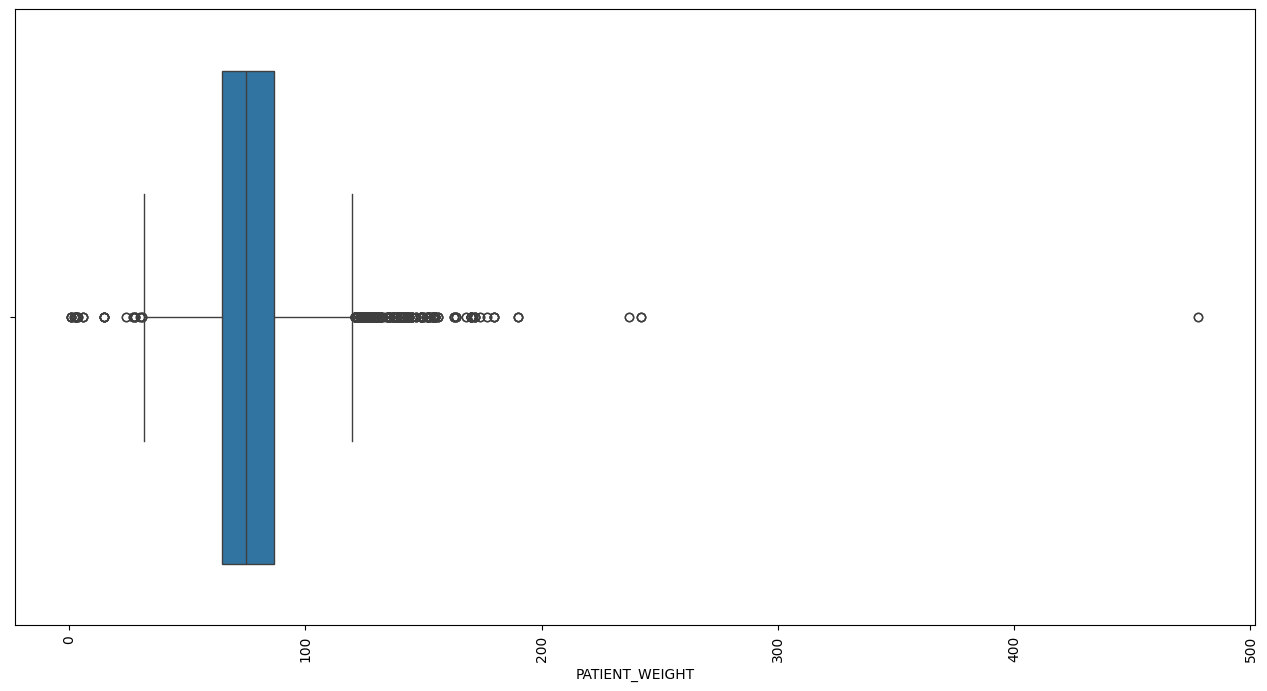

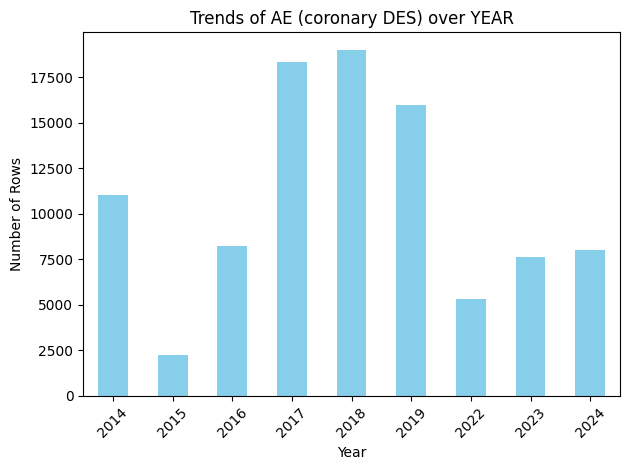

2014    11035
2015     2258
2016     8211
2017    18324
2018    19011
2019    15988
2022     5313
2023     7605
2024     8023
Name: YEAR, dtype: int64

In [30]:
# age vs frequency
alldata["PATIENT_WEIGHT"] = alldata["PATIENT_WEIGHT"].apply(lambda x : float(re.sub(r"KG", "", str(x))))

#### plot 3 figures to show patient's demographic
plt.figure(figsize=(12, 8))

sns.boxplot(alldata, x = "PATIENT_AGE")
plt.title("PATIENT AGE")
plt.show()

sns.boxplot(alldata, x = "PATIENT_SEX", y = "PATIENT_AGE")
plt.show()

plt.figure(figsize=(16, 8))
sns.boxplot(alldata, x = "PATIENT_WEIGHT")
plt.xticks(rotation=90)
plt.show()

# trends over the year
grouped = alldata.groupby('YEAR').size()
grouped.plot(kind='bar', color='skyblue')
plt.title('Trends of AE (coronary DES) over YEAR')
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

alldata["YEAR"].value_counts().sort_index()

In [ ]:
for i in cols:
    print(alldata[i].isna().value_counts())

# Comment: For patient demographic, I probably can look into patient age, sex and weight only since I got >=10000 records over 10 years. Other will be ignored

False    95768
Name: MDR_REPORT_KEY, dtype: int64
True     87696
False     8072
Name: SEQUENCE_NUMBER_TREATMENT, dtype: int64
True     52763
False    43005
Name: SEQUENCE_NUMBER_OUTCOME, dtype: int64
True     48437
False    47331
Name: PATIENT_AGE, dtype: int64
True     74777
False    20991
Name: PATIENT_SEX, dtype: int64
True     72968
False    22800
Name: PATIENT_WEIGHT, dtype: int64
True     95422
False      346
Name: PATIENT_ETHNICITY, dtype: int64
True     94214
False     1554
Name: PATIENT_RACE, dtype: int64
False    95239
True       529
Name: PATIENT_SEQUENCE_NUMBER_patient, dtype: int64
False    95239
True       529
Name: DATE_RECEIVED_patient, dtype: int64


In [144]:
## Identify all the adverse events reported
# MACCE for DES: https://www.ncbi.nlm.nih.gov/books/NBK531619/table/table31/

adverse_events = pd.read_excel("adverse_event.xlsx")
adverse_events.columns = adverse_events.columns.str.strip().str.lower()

def counting_AE(x, index):
    x = str(x).strip().lower()
    
    synonyms = adverse_events[index].values
    synonyms = list(np.append(synonyms, [index]))
    if any(str(val) in x for val in synonyms):
        return 1
    else: 
        return 0

# create new column for counting 
for i in adverse_events.columns:
    alldata[i] = alldata["FOI_TEXT"].apply(lambda x: counting_AE(x, i))
# alldata["MDR_REPORT_KEY", adverse_events.columns]

In [145]:
adverse_events.columns
temp = alldata[["MDR_REPORT_KEY", "FOI_TEXT", 'pain', 'fatigue', 'dyspnea', 'in-stent restenosis', 'stent thrombosis',
       'myocardial infarction', 'fracture', 'death', 'allergic',
       'revascularization']]
temp.to_excel("temp.xlsx", index=False)